In [2]:
# 📦 数据处理
import pandas as pd
import numpy as np

# 📊 可视化
import matplotlib.pyplot as plt

# 📅 statsmodels - 时间序列可视化
from statsmodels.graphics.tsaplots import (
    month_plot,
    quarter_plot,
    plot_acf,
    plot_pacf
)

# ⏱️ statsmodels - 时间序列分解 & 模型
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 📈 模型评估指标
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error


)

# 🔍 pmdarima - 自动 ARIMA/SARIMA 参数选择与建模
from pmdarima import auto_arima, ARIMA, model_selection

# 🧪 sklearn - 网格搜索
from sklearn.model_selection import ParameterGrid


In [4]:
df = pd.read_csv("airmiles.csv",
                 index_col = "Date",
                 parse_dates = True,
                 dayfirst = True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [8]:
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [10]:
df = df.rename(columns={'airmiles': 'y'})
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


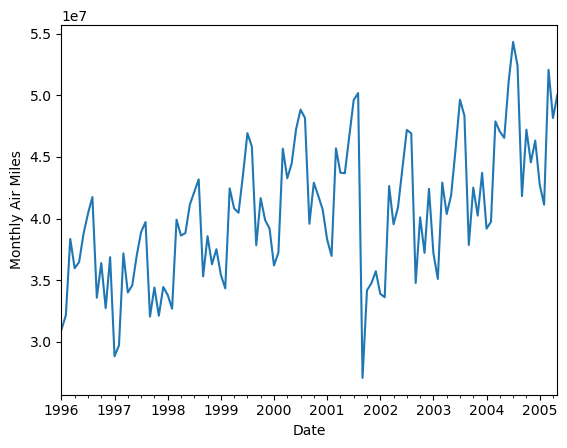

In [12]:
df['y'].plot(ylabel = 'Monthly Air Miles')
plt.show()

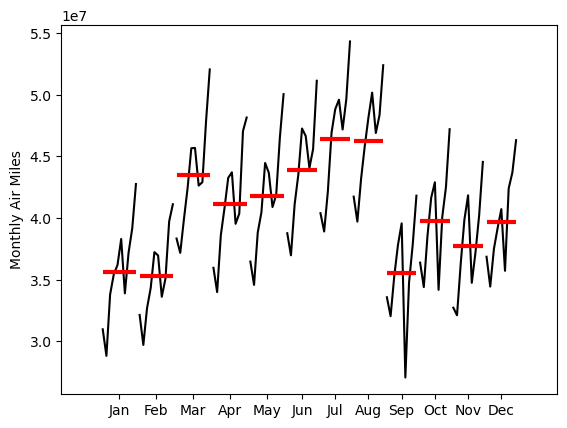

In [14]:
month_plot(df['y'],
           ylabel = 'Monthly Air Miles')
plt.show()

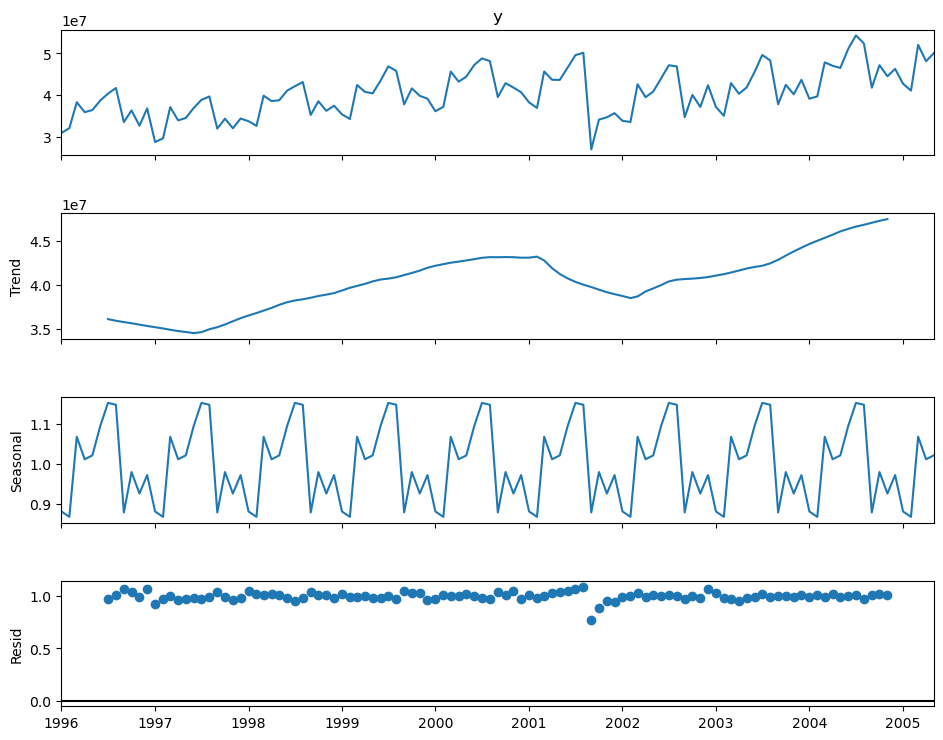

In [16]:
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

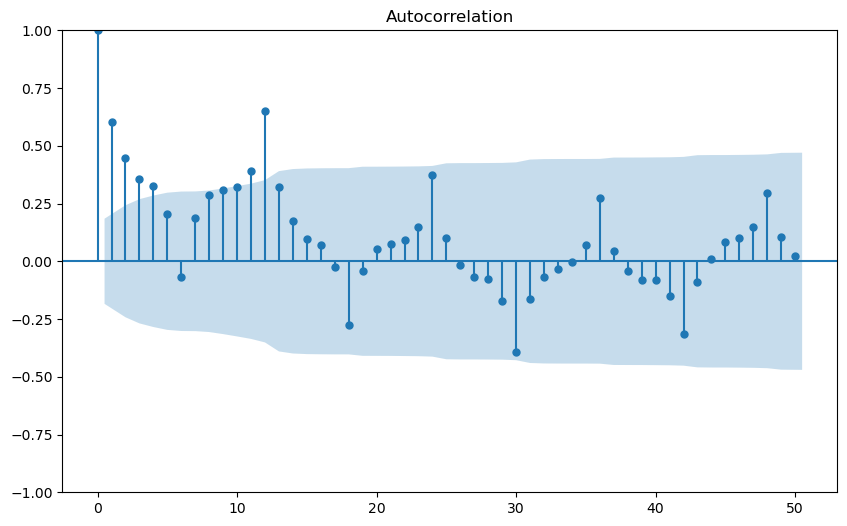

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 50, ax = ax)
plt.show()

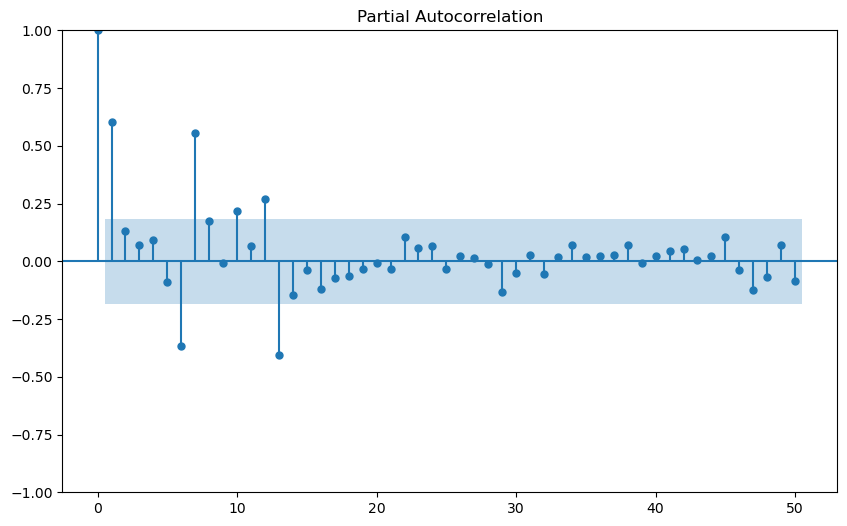

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 50, ax = ax)
plt.show()

In [19]:
train, test = df.iloc[:-12,:], df.iloc[-12:, :]
model = ExponentialSmoothing(train,
                             trend = "add",
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

D:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


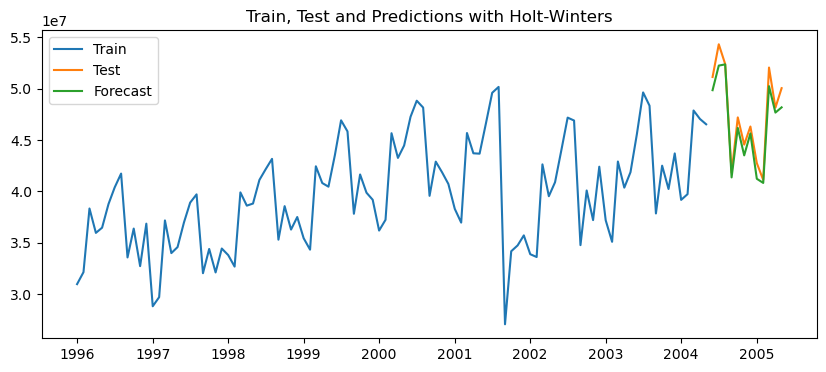

The MAE is 1046933.53
The RMSE is 1230641.26
The MAPE is 2.16 %


In [24]:
predictions = model.forecast(steps = len(test)).rename("Holt-Winters")
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
    # Plot training, test, and forecasts
    plt.figure(figsize = (10,4))
    plt.plot(train, label = 'Train')
    plt.plot(test, label = 'Test')
    plt.plot(predictions, label = "Forecast")
    plt.title(f"Train, Test and Predictions with {chart_title}")
    plt.legend()
    plt.show()
    
    # Calculating the MAE, RMSE, and MAPE
    mae = mean_absolute_error(test, predictions)
    rmse = root_mean_squared_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    
    # print the metrics value
    print(f"The MAE is {mae:.2f}")
    print(f"The RMSE is {rmse:.2f}")
    print(f"The MAPE is {100 * mape:.2f} %")

model_assessment(train, test, predictions, "Holt-Winters")

In [26]:
model = ExponentialSmoothing(df['y'],
                             trend = 'add',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

D:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


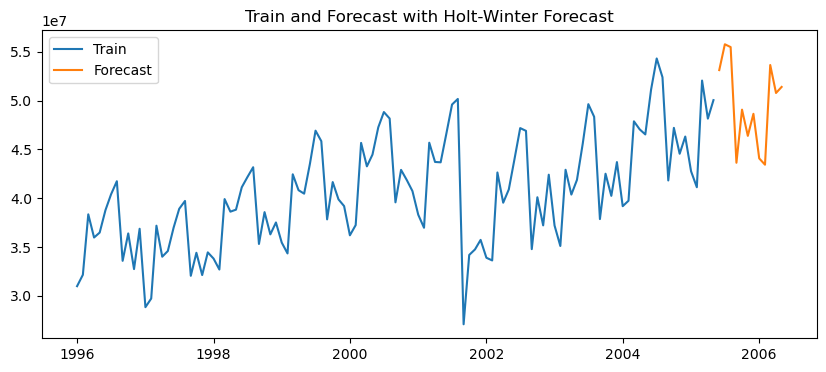

In [28]:
predictions = model.forecast(steps = 12).rename("Holt-Winters")
def plot_future(y, forecast, title):
    # Plot training and forecasts
    plt.figure(figsize = (10,4))
    plt.plot(y, label = 'Train')
    plt.plot(forecast, label = "Forecast")
    plt.title(f"Train and Forecast with {title}")
    plt.legend()
    plt.show()
plot_future(df['y'], predictions, 'Holt-Winter Forecast')

In [30]:
model_sarima = auto_arima(train,
                          m = 12)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -1654.793
Date:                            Fri, 18 Jul 2025   AIC                           3319.586
Time:                                    19:35:31   BIC                           3332.612
Sample:                                01-01-1996   HQIC                          3324.858
                                     - 05-01-2004                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1618      0.113     -1.436      0.151      -0.383       0.059
ar.S.L12       0.6304      0.289      2.180      0.029       0.064       1.197
ar.S.L24       0.1830      0.132      1.385      0.166      -0.076       0.442
ma.S.L12      -0.4774      0.329     -1.450      0.147      -1.123       0.168
sigma2      1.985e+13   4.49e-14   4.42e+26      0.000    1.99e+13    1.99e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):               453.29
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -2.33
Prob(H) (two-sided):                  0.52   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+42. Standard errors may be unstable.
"""

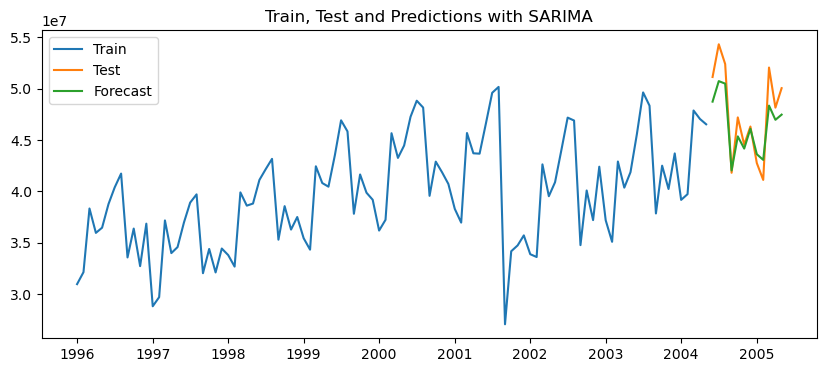

The MAE is 1736087.15
The RMSE is 2085010.33
The MAPE is 3.51 %


In [31]:
predictions_sarima = model_sarima.predict(n_periods = len(test))
model_assessment(train, test, predictions_sarima, "SARIMA")